In [1]:
import matplotlib.pyplot as plt
import lifa.fames.process_mixing_ratio as em
#from lifa.fames.reports import plot_signals
from importlib import reload

import glob
import numpy as np

### Lista de arquivos

In [2]:
# Gera lista de arquivos a serem processados. Arquivos precisam estar ordenados
files = sorted(glob.glob(r'.\sample_data\20241204_CEPEMA_FLARE_acima da chama_p=23\a???????.??????'))
#files = sorted(glob.glob(r'd:\FAMES\Medidas\Medidas CEPEMA\20241204-Alex e Jairo\Meio chama p=23mm bom pra caralho\a???????.??????'))
#files = sorted(glob.glob(r'd:\FAMES\Medidas\Medidas CEPEMA\20241204-Alex e Jairo\Topo chama p-23mm\a???????.??????'))
#files = sorted(glob.glob(r'c:\Users\jairo\Documents\Medidas FAMES\Mikhail\medidas-Mikhail\20240904\20240904\pinhoe26.469 full ap top the fire\a???????.??????'))
#files = sorted(glob.glob(r'c:\Users\jairo\Documents\Medidas FAMES\Mikhail\medidas-Mikhail\20240904\20240904\pinhole26.465 full ap top the fire\a???????.??????'))
files

['.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0505.552826',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0505.560971',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0505.565115',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0505.573260',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0505.581404',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0505.585549',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0505.593694',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0506.001838',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0506.005984',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0506.014128',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0506.022272',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0506.030417',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da cha

### Configuração de processamento

In [12]:
# Configuração do processamento
config = {
    'zenith_angle': 12,
    'elevation': 0,
    'cross_talk_355_353': 160,
    'ch4_cal': 4000,
    'co2_cal': 26000,
    'ce_cal': 0.25,
    'fluo_cal': 100,
    'z_ref_idx': 96,
    'z_flare_idx': 106,
    'dead_time': 1/240,
    'background_min_idx': 4000, #index min para regiao de background ~12000
    'background_max_idx' : 4900, #index max para regiao considerada background ~15000
    'z_min_flare': 100,
    'z_max_flare': 700,
    'flare_roi': 10,
    'flare_pos': 400,
    'n2_raman': {'channel':'00353.o_an', 'bin_shift':0, 'lambda': 323},
    'rayleigh': {'channel':'00355.o_an', 'bin_shift':0, 'lambda': 355},
    'co2_raman': {'channel':'00371.o_ph', 'bin_shift':3, 'lambda': 371},
    'ch4_raman_s': {'channel':'00395.s_ph', 'bin_shift':3, 'lambda': 395},
    'ch4_raman_p': {'channel':'00395.p_ph', 'bin_shift':3, 'lambda': 395},
    'fluorescence': {'channel':'00460.o_an', 'bin_shift':1, 'lambda': 460},
    'n2_raman_b': {'channel':'00530.o_an', 'bin_shift':0, 'lambda': 530},
    'rayleigh_b': {'channel':'00532.o_an', 'bin_shift':0, 'lambda': 532},
}

### Processamento

In [13]:
# Junta arquivos em grupos e processa. Saida é um Dataframe pandas
step = 1    # Passo para grupos de média
size = 5  # Numero de arquivos sequencias para media
reload(em)
output = em.emissions_group(files, config=config, step=step, size=size)
output

,start_time,stop_time,duration,bin_width,cross_talk_355_353,ch4_cal,co2_cal,ce_cal,fluo_cal,z_ref,...,n2_raman_trace,rayleigh_trace,co2_raman_trace,ch4_raman_s_trace,ch4_raman_p_trace,fluorescence_trace,rayleigh_b_trace,n2_raman_b_trace,number_of_files,files
0,2024-12-05 05:54:47+00:00,2024-12-05 05:58:14+00:00,0 days 00:03:27,3.75,160,4000,26000,0.25,100,361.875,...,"[6.666190713426507, 8.10333157292763, 9.479868...","[131.22534772636038, 153.87975521880105, 175.0...","[0.07615295837078148, 0.1054863527910719, 0.13...","[0.005204500109526195, 0.0012962145449048408, ...","[0.003853941468443697, 0.02144251538401419, 0....","[0.019622232569666664, 0.015973708745856463, 0...","[42.48073277147781, 50.048768199244215, 57.016...","[2.110036029405708, 2.549401935420941, 2.96971...",5,[.\sample_data\20241204_CEPEMA_FLARE_acima da ...
1,2024-12-05 05:55:28+00:00,2024-12-05 05:58:55+00:00,0 days 00:03:27,3.75,160,4000,26000,0.25,100,361.875,...,"[6.686686843131585, 8.123485800281427, 9.50131...","[131.43045239098822, 154.4495572156606, 176.28...","[0.07223586694577443, 0.11330328827346046, 0.1...","[0.0051589044522810275, 0.0012506188876596732,...","[0.005816785028527844, 0.017542405488288698, 0...","[0.019246480708446256, 0.015750323473580963, 0...","[42.22138365063514, 49.87234183633073, 57.0277...","[2.106911233512103, 2.5467980483940416, 2.9668...",5,[.\sample_data\20241204_CEPEMA_FLARE_acima da ...
2,2024-12-05 05:56:10+00:00,2024-12-05 05:59:36+00:00,0 days 00:03:26,3.75,160,4000,26000,0.25,100,361.875,...,"[6.637174485487158, 8.072321028750308, 9.45078...","[129.68318575470457, 152.53099780887717, 174.4...","[0.06637458167080232, 0.12895605866392784, 0.1...","[0.005189301663184842, 0.001281016098563487, 0...","[0.009729540352121518, 0.01363808050330209, 0....","[0.016599518894793164, 0.014165007922032125, 0...","[41.26350583643921, 48.76405158687429, 55.6945...","[2.095488628059254, 2.534401459648068, 2.95385...",5,[.\sample_data\20241204_CEPEMA_FLARE_acima da ...
3,2024-12-05 05:56:51+00:00,2024-12-05 06:00:18+00:00,0 days 00:03:27,3.75,160,4000,26000,0.25,100,361.875,...,"[6.620199840424138, 8.055467668032524, 9.43672...","[126.91776510607241, 149.31797086060217, 171.4...","[0.0761659857064744, 0.14266530489127277, 0.12...","[0.0032720535835625954, 0.001317926712134544, ...","[0.007775318013065777, 0.011683794515274496, 0...","[0.012814885142316434, 0.012811083431926384, 0...","[39.574212825321794, 46.65709969063229, 53.458...","[2.085691019897477, 2.5268981464346867, 2.9469...",5,[.\sample_data\20241204_CEPEMA_FLARE_acima da ...
4,2024-12-05 05:57:33+00:00,2024-12-05 06:00:59+00:00,0 days 00:03:26,3.75,160,4000,26000,0.25,100,361.875,...,"[6.588806876155031, 8.020827129934855, 9.39249...","[124.13575353612595, 146.63008963989978, 168.7...","[0.08203860484687917, 0.1426718185414409, 0.12...","[0.0033263344259119422, 0.0013722075544838907,...","[0.015594569533704417, 0.017548919173813484, 0...","[0.011644510625679061, 0.013406789749566883, 0...","[37.99260906832747, 45.08093834296224, 51.8050...","[2.0736655006141715, 2.513201812706865, 2.9397...",5,[.\sample_data\20241204_CEPEMA_FLARE_acima da ...
5,2024-12-05 05:58:14+00:00,2024-12-05 06:01:41+00:00,0 days 00:03:27,3.75,160,4000,26000,0.25,100,361.875,...,"[6.543962598628244, 7.974743119774904, 9.33769...","[120.52039684671563, 142.41467731879413, 164.4...","[0.08594732988673616, 0.1387569029013402, 0.13...","[0.001417803494584876, 0.001417803494584876, 0...","[0.015605425617317974, 0.01755977525742704, 0....","[0.011157529663663013, 0.01313583538968377, 0....","[36.05555511823462, 42.7146433361415, 49.25151...","[2.0610271343517548, 2.5002681802708597, 2.927...",5,[.\sample_data\20241204_CEPEMA_FLARE_acima da ...
6,2024-12-05 05:58:55+00:00,2024-12-05 06:02:22+00:00,0 days 00:03:27,3.75,160,4000,26000,0.25,100,361.875,...,"[6.5031704983460665, 7.932686955447178, 9.2857...","[118.55435024812436, 140.31030735126427, 161.4...","[0.09378253195966461, 0.12703246191762194, 0.1...",

### Apresentação

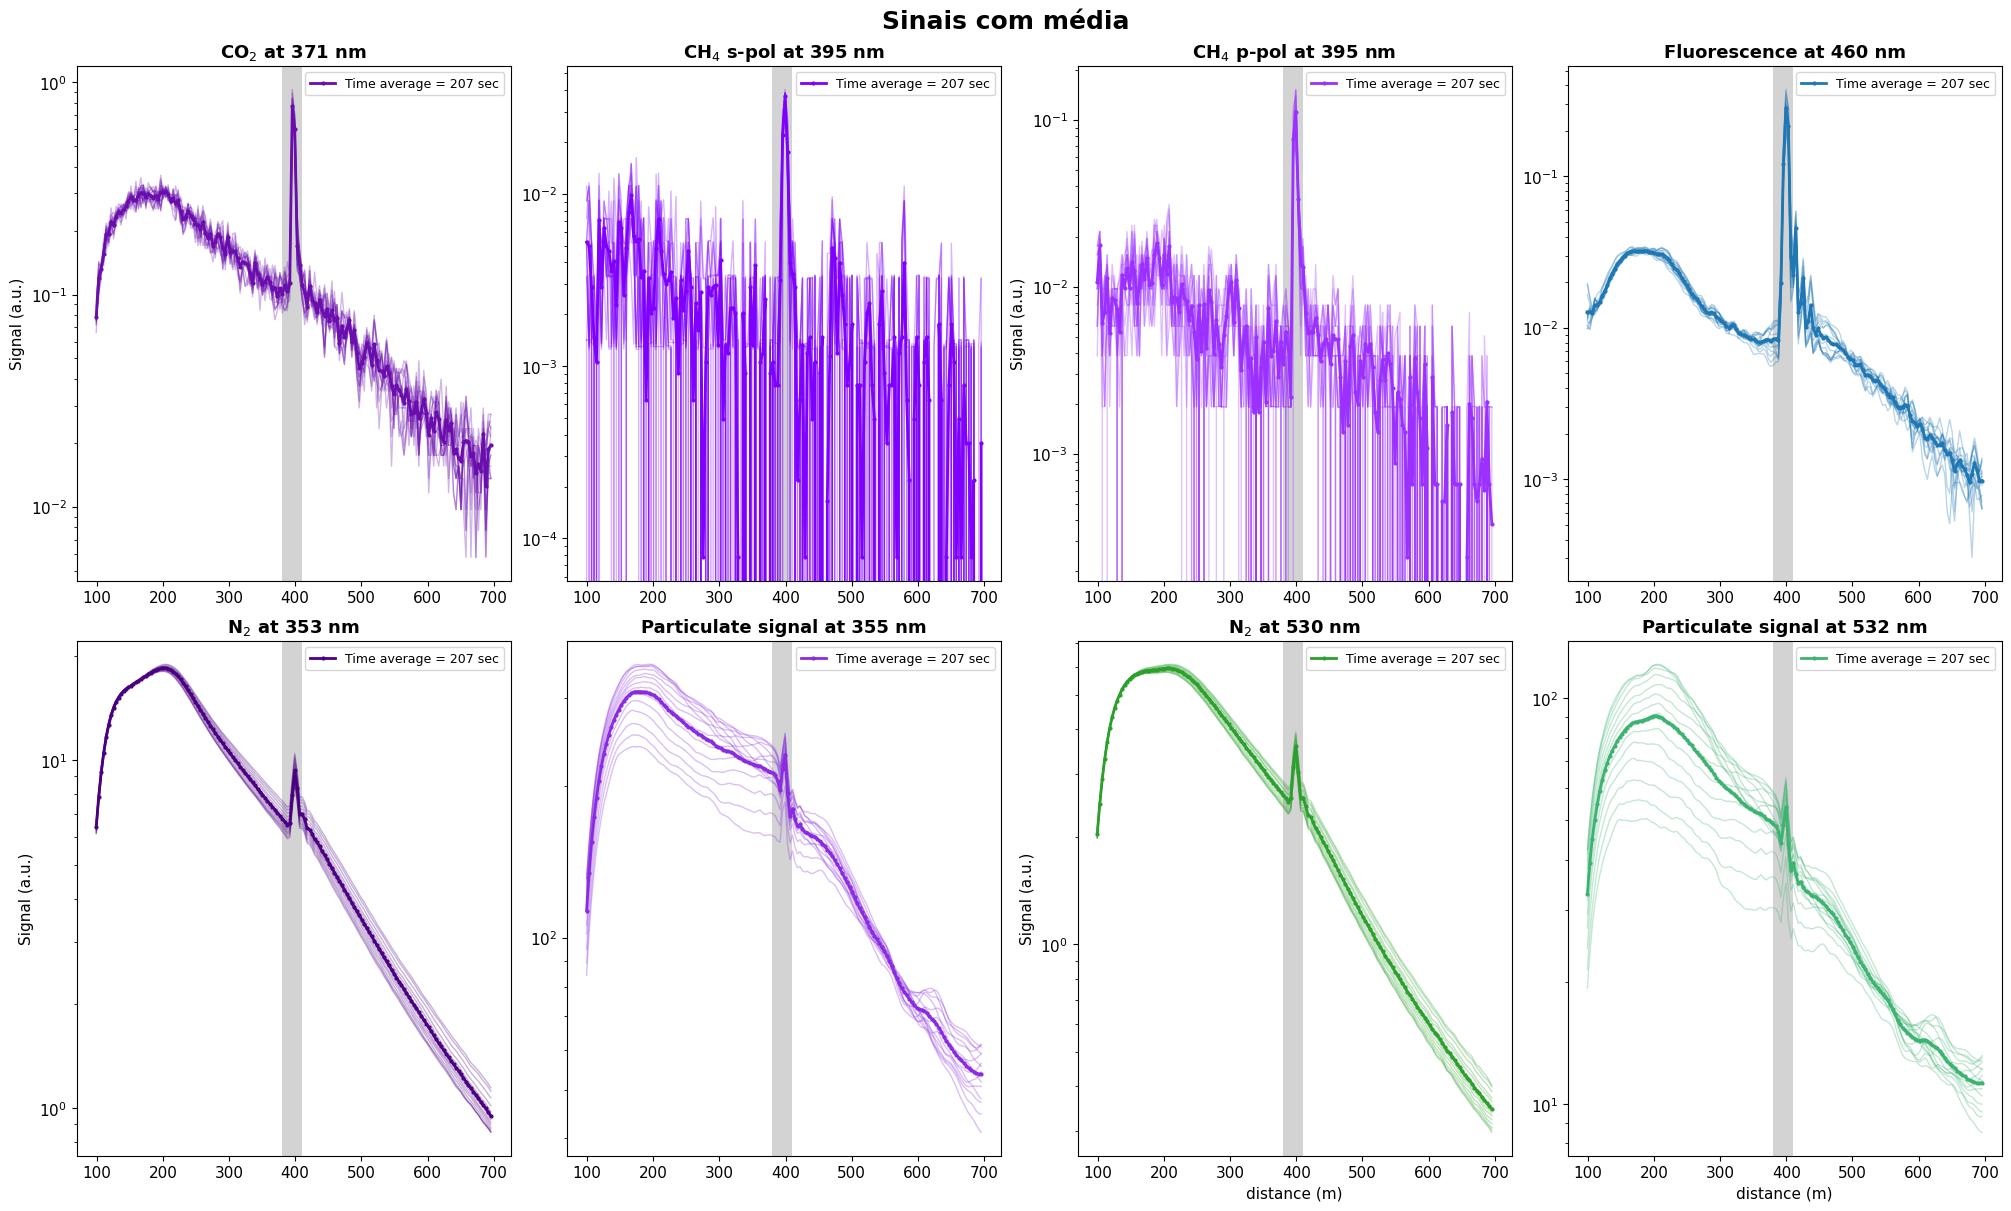

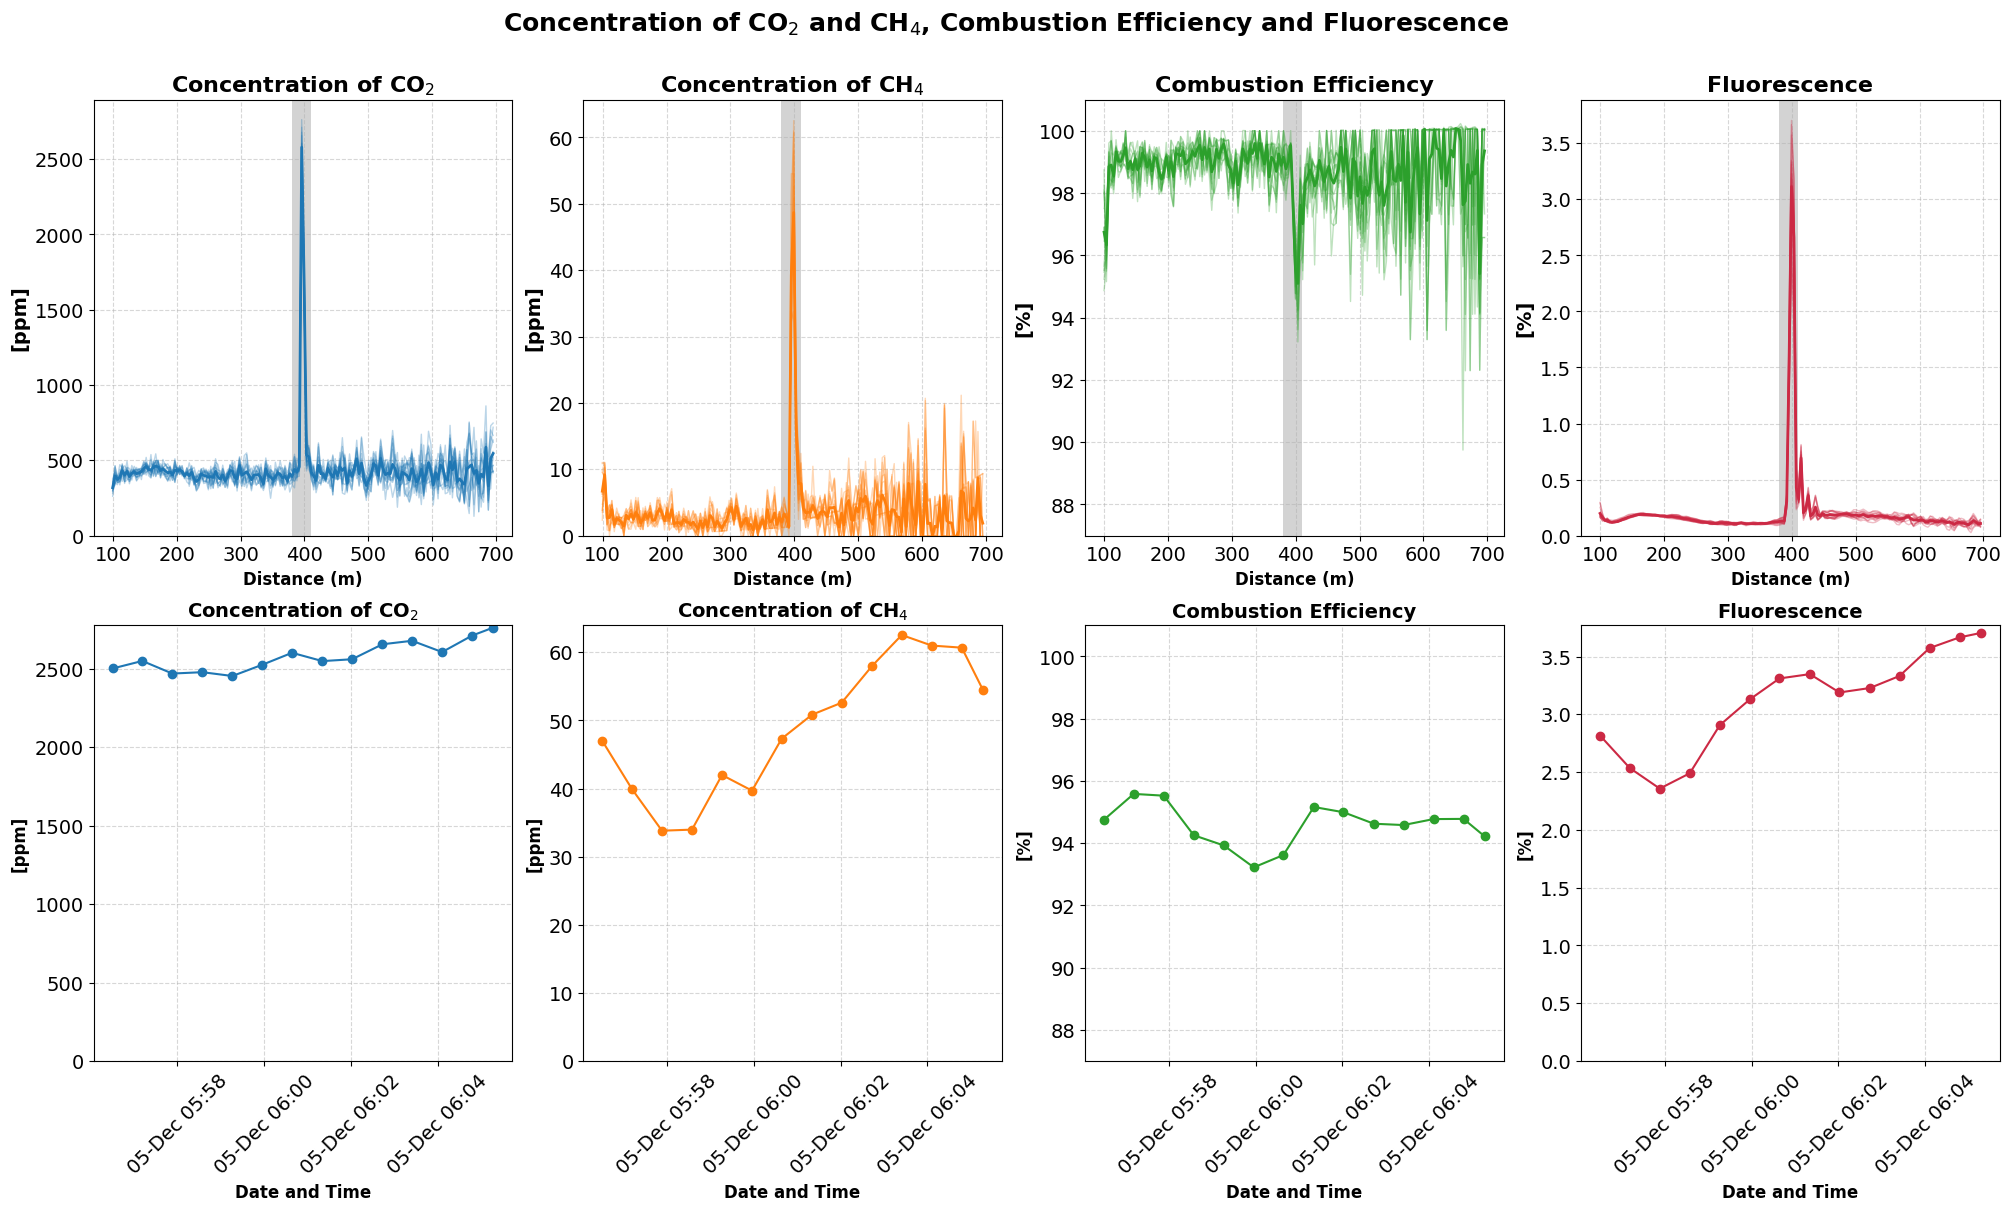

In [14]:
import fames_reports as fames
reload(fames)


# TODO: passar posição do flare para funcao que plota graficos - ai não precisa reprocessar
filtered = output
fig = fames.plot_signals(filtered, 380, 410)
plt.show()
fig_mix = fames.plot_emissions(filtered, 380, 410)
plt.show()


In [50]:
output[:3]

,start_time,stop_time,duration,bin_width,cross_talk_355_353,ch4_cal,co2_cal,ce_cal,fluo_cal,z_ref,...,n2_raman_trace,rayleigh_trace,co2_raman_trace,ch4_raman_s_trace,ch4_raman_p_trace,fluorescence_trace,rayleigh_b_trace,n2_raman_b_trace,number_of_files,files
0,2025-09-12 18:35:04+00:00,2025-09-12 18:35:45+00:00,0 days 00:00:41,3.75,160,4000,26000,0.25,100,410.625,...,"[0.180170706067816, 0.18075136375178588, 0.183...","[6.997264201408224, 7.012595903062366, 7.05153...","[0.013864326216660453, -0.005678056325477808, ...","[-0.0008142336731571217, -0.000814233673157121...","[-0.001367916389795639, -0.001367916389795639,...","[0.007829282960852169, 0.009137518594886984, 0...","[2.7115122014963164, 2.723291912953205, 2.7348...","[0.05877567672815864, 0.059720513574960776, 0....",1,[c:\Users\jairo\Documents\Medidas FAMES\202509...
1,2025-09-12 18:41:56+00:00,2025-09-12 18:42:36+00:00,0 days 00:00:40,3.75,160,4000,26000,0.25,100,410.625,...,"[0.20808857266744385, 0.20758534687890545, 0.2...","[7.266133064311385, 7.275982103237135, 7.32429...","[-5.4282185943627953e-05, 0.009716511283909404...","[-1.0856437188725591e-05, -1.0856437188725591e...","[-1.0856437188725591e-05, -1.0856437188725591e...","[0.007338934793299501, 0.007240164866512799, 0...","[3.1908024441982956, 3.207364110978453, 3.2245...","[0.06551615480301365, 0.06541179412565423, 0.0...",1,[c:\Users\jairo\Documents\Medidas FAMES\202509...
2,2025-09-12 18:48:47+00:00,2025-09-12 18:49:28+00:00,0 days 00:00:41,3.75,160,4000,26000,0.25,100,410.625,...,"[0.2086531581988474, 0.20678687247847016, 0.20...","[7.024312070462375, 7.053070891408859, 7.06811...","[0.00974908059547558, -2.1712874377451182e-05,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-2.1712874377451182e-05, -2.1712874377451182e...","[0.005915535909409186, 0.006232345108534432, 0...","[3.079511263293827, 3.0752138396868682, 3.0907...","[0.06672806387532848, 0.06639820959153209, 0.0...",1,[c:\Users\jairo\Documents\Medidas FAMES\202509...


In [30]:
output.keys()

Index(['start_time', 'stop_time', 'duration', 'bin_width',
       'cross_talk_355_353', 'ch4_cal', 'co2_cal', 'ce_cal', 'fluo_cal',
       'z_ref', 'co2_ref', 'ch4_ref', 'ce_ref', 'ce_m_ref', 'fluo_ref',
       'z_flare', 'z_min_roi', 'z_max_roi', 'co2', 'ch4', 'ce', 'ce_m', 'fluo',
       'z_trace', 'ch4_mixing_trace', 'co2_mixing_trace', 'ce_mixing_trace',
       'ce_trace', 'fluo_mixing_trace', 'n2_raman_trace', 'rayleigh_trace',
       'co2_raman_trace', 'ch4_raman_s_trace', 'ch4_raman_p_trace',
       'fluorescence_trace', 'rayleigh_b_trace', 'n2_raman_b_trace',
       'number_of_files', 'files'],
      dtype='object')

In [54]:
filtered

,start_time,stop_time,duration,bin_width,cross_talk_355_353,ch4_cal,co2_cal,ce_cal,fluo_cal,z_ref,...,n2_raman_trace,rayleigh_trace,co2_raman_trace,ch4_raman_s_trace,ch4_raman_p_trace,fluorescence_trace,rayleigh_b_trace,n2_raman_b_trace,number_of_files,files
1,2025-09-12 18:41:56+00:00,2025-09-12 18:42:36+00:00,0 days 00:00:40,3.75,160,4000,26000,0.25,100,410.625,...,"[0.20808857266744385, 0.20758534687890545, 0.2...","[7.266133064311385, 7.275982103237135, 7.32429...","[-5.4282185943627953e-05, 0.009716511283909404...","[-1.0856437188725591e-05, -1.0856437188725591e...","[-1.0856437188725591e-05, -1.0856437188725591e...","[0.007338934793299501, 0.007240164866512799, 0...","[3.1908024441982956, 3.207364110978453, 3.2245...","[0.06551615480301365, 0.06541179412565423, 0.0...",1,[c:\Users\jairo\Documents\Medidas FAMES\202509...
2,2025-09-12 18:48:47+00:00,2025-09-12 18:49:28+00:00,0 days 00:00:41,3.75,160,4000,26000,0.25,100,410.625,...,"[0.2086531581988474, 0.20678687247847016, 0.20...","[7.024312070462375, 7.053070891408859, 7.06811...","[0.00974908059547558, -2.1712874377451182e-05,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-2.1712874377451182e-05, -2.1712874377451182e...","[0.005915535909409186, 0.006232345108534432, 0...","[3.079511263293827, 3.0752138396868682, 3.0907...","[0.06672806387532848, 0.06639820959153209, 0.0...",1,[c:\Users\jairo\Documents\Medidas FAMES\202509...


In [45]:
filtered = output.loc[1:10]